# Trabajo Semana 4 - K-means Algorithm
### Asignatura: Machine Learning
#### Especialización en Inteligencia Artificial
##### Realizado por: Michael Andrés Mora Poveda

<font size='3'>
Hola a todos, el objectivo de este trabajo es aplicar algoritmos <b>no supervisados</b> a los datasets trabajados en la semana dos: <b>Congressional Voting Records Data Set</b> y <b>adults</b>
    
    

Los siguientes links serán útiles para conocer la estructura de los datasets:

* https://archive.ics.uci.edu/ml/datasets/adult    
* https://www.kaggle.com/datasets/devvret/congressional-voting-records
* https://github.com/micmorap/Machine_Learning_Portfolio/blob/main/AI%20Specialization%20-%20U%20of%20Minuto%20de%20Dios/Machine_Learning/Semana_2/Análisis%20exploratorio%20de%20datos%20-%20ML.ipynb
    


</font>

## 1. K-Modes para Congressional Voting Records dataset
<font size='3'>
<br>
Para empezar, vamos a importar las librerías clásicas y el dataset correspondiente:
</br>
</font>

In [1]:
#Se importan las librerías clásicas:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import plotly as pty
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes


In [2]:
#Importamos los archivos contenidos en el folder y chequeamos los datasets:
dfHouseVotes = pd.read_csv('house-votes-84.data', sep=',')
dfHouseVotes.head(2)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n


In [3]:
# Leer la metadata asociada al dataset
with open("house-votes-84.names") as f:
    #print(f.read())
    (f.read())

<font size='3'>
<br>
De acuerdo a la metadata tomada del repositorio, vamos a proceder con renombrar los headers del dataset:
</br>
</font>

In [4]:
# Definimos el listado de columnas y renombramos los headers del dataset
dfHouseVotes.columns = ['Class Name','handicapped-infants','water-project-cost-sharing',
                        'adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
                        'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras',
                        'mx-missile','immigration','synfuels-corporation-cutback','education-spending',
                        'superfund-right-to-sue','crime','duty-free-exports',
                        'export-administration-act-south-africa']

In [5]:
# chequeamos de nuevo
dfHouseVotes.tail(1)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
433,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,?,n


In [38]:
vote_categorical_data = dfHouseVotes.set_index("Class Name")
#type(vote_categorical_data)

pandas.core.frame.DataFrame

<font size='3'>
<br>
Con el dataset ya revisado y depurado, vamos a realizar la iteración para encontrar el número óptimo de clústers:
</br>
</font>

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3390.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 3390.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 3390.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 3390.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 3390.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 1699.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 42, cost: 1699.0
Run 2, iteration: 2/100, moves: 2, cost: 1699.0
Init: initializing centroids
Init

/var/folders/xh/l9ggclrd1fx2brvxlnc_9hv40000gn/T/ipykernel_3049/3864616271.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, cost, 'bo-', c= 'steelblue')


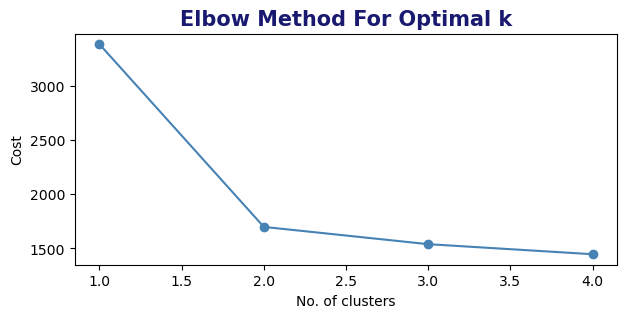

In [69]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(vote_categorical_data)
    cost.append(kmode.cost_)

plt.figure(1, figsize = (7,3))    

plt.plot(K, cost, 'bo-', c= 'steelblue')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k', fontsize = 15, weight='bold', color= 'midnightblue')
plt.show()

<font size='3'>
<br>
Dada la gráfica anterior, el número óptimo de clústers es 2. Por lo tanto, vamos a aplicar el algoritmo con base a esta información.
</br>
</font>

In [39]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(vote_categorical_data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 44, cost: 1705.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 56, cost: 1699.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 73, cost: 1705.0
Run 3, iteration: 2/100, moves: 7, cost: 1705.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 29, cost: 1699.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 20, cost: 1699.0
Best run was number 2


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [50]:
# Asignamos el cluster correspondiente a cada uno de los registros del dataset:
vote_categorical_data.insert(0, "Cluster", clusters)
vote_categorical_data

,Cluster,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
Class Name,,,,,,,,,,,,,,,,,
republican,0,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
democrat,0,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
democrat,0,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
democrat,0,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
democrat,0,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
republican,0,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
democrat,1,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
republican,0,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y


In [47]:
# Distribución por conteo de cada uno de los clústers:
vote_categorical_data.groupby('Cluster').count()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
Cluster,,,,,,,,,,,,,,,,
0,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
1,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222


<font size='3'>
<br>
En términos porcentaules, el 48% pertenece al primer clúster y el 52% restante al segundo clúster.
</br>
Ahora, vamos a ver un ejemplo del test Chi cuadrado para ver la relación entre dos variables categóricas
de nuestro dataset:
</font>

In [61]:
# importamos librería stats de SciPy y tomamos dos columnas aleatorias del dataset:
from scipy.stats import chi2_contingency
data_chi_test = pd.crosstab(index=vote_categorical_data['immigration'], columns=vote_categorical_data['handicapped-infants'])

In [62]:
# ejecutamos la función chi2_contingency para calcular el Chi cuadrado,
# P-value, grados de libertad y valores esperados:
chi2, pval, dof, expected = chi2_contingency(data_chi_test)
print('Chi-squared test statistic:', chi2)
print('P-value:', pval)
print('Degrees of freedom:', dof)
print('Expected values:\n', expected)

Chi-squared test statistic: 45.766653948826736
P-value: 2.754179185429524e-09
Degrees of freedom: 4
Expected values:
 [[  0.19354839   3.79032258   3.01612903]
 [  5.86175115 114.79262673  91.34562212]
 [  5.94470046 116.41705069  92.63824885]]


In [63]:
#Condicional para saber si existe asociación significativa entre dichos features:
if pval < 0.05:
    print('There is a significant association between the two categorical variables.')
else:
    print('There is no significant association between the two categorical variables.')

There is a significant association between the two categorical variables.


## 2. K-Means para Adults dataset
<font size='3'>

</font>

<font size='3'>
Para este segundo ejercicio, aplicaremos el algoritmo <b>K-means<b> (no supervisado) para <b>adults dataset</b>:
<br>
</font>

In [8]:
# Leemos el dataset y reajustamos columnas:
dfAdults = pd.read_csv('adult.data', sep=',')

In [9]:
# Metadata del dataset
with open("adult.names") as f:
    (f.read())
    #print(f.read()) 

<font size='3'>
<br>
De acuerdo a la metadata tomada del repositorio, vamos a proceder con renombrar los headers del dataset:
</br>
</font>

In [10]:
# Renombramos las columnas:
dfAdults.columns = ['age','workclass','fnlwgt', 'education','education-number','marital-status','occupation',
'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary-condition']

In [11]:
# Chequeamos la estructura general ajustada del dataset y hacemos una copia de backup:
dfAdults.tail(1)
df_Adults_2 = dfAdults.copy()

<font size='3'>
<br>
Ahora, aplicaremos K-means en <b>2D</b> basados entre las variables capital-gain y hours-per-week:
</br>
</font>

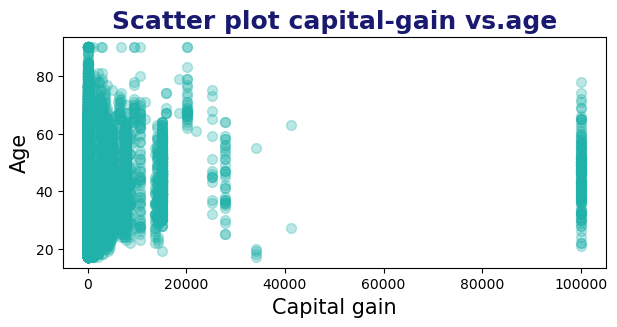

In [12]:
# Creamos un scatterplot en 2D entre capital ganado y horas trabajadas por semana:
plt.figure(1, figsize = (7,3))
plt.title("Scatter plot capital-gain vs.age", fontsize = 18, weight='bold', color= 'midnightblue')
plt.xlabel("Capital gain", fontsize = 15)
plt.ylabel("Age", fontsize = 15)
plt.scatter(x= "capital-gain", y="age", data = dfAdults, s = 50, c='lightseagreen', alpha = 0.3)
plt.show()

<font size='3'>
<br>
Luego, vamos a enfocarnos en buscar el número correcto de clústers <b>k</b> para este ejercicio, teniendo en cuenta dos features: <b>capital gain</b> y <b>Age</b> 
</br>
</font>

In [13]:
# Hacemos el scaling de las variables para evitar sesgos:
# Seleccionamos las columnas e instanciamos un objeto StandardScaler:
cols_to_scale = ['capital-gain', 'age']
scaler = StandardScaler()

In [14]:
# Hacemos la estandarización con los métodos fit y transform:
scaler.fit(dfAdults[cols_to_scale])
dfAdults[cols_to_scale] = scaler.transform(dfAdults[cols_to_scale])

In [15]:
# Chequeamos esta transformación:
dfAdults[cols_to_scale].head(3)

,capital-gain,age
0,-0.145914,0.837097
1,-0.145914,-0.042640
2,-0.145914,1.057031


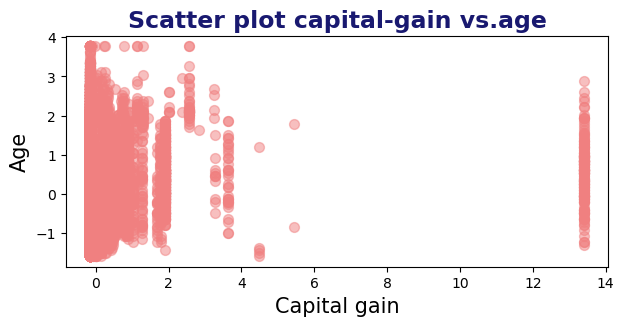

In [16]:
# Creamos un scatterplot en 2D entre capital ganado y horas trabajadas por semana:
plt.figure(1, figsize = (7,3))
plt.title("Scatter plot capital-gain vs.age", fontsize = 17, weight='bold', color= 'midnightblue')
plt.xlabel("Capital gain", fontsize = 15)
plt.ylabel("Age", fontsize = 15)
plt.scatter(x= "capital-gain", y="age", data = dfAdults, s = 50, c='lightcoral', alpha = 0.5)
plt.show()

In [17]:
X = dfAdults[cols_to_scale].values
X

array([[-0.14591373,  0.83709708],
       [-0.14591373, -0.04264043],
       [-0.14591373,  1.05703146],
       ...,
       [-0.14591373,  1.42358875],
       [-0.14591373, -1.21562378],
       [ 1.88840054,  0.98372   ]])

In [18]:
# Calculamos para el rango de entre 1 y 10 clústers el performance con la métrica de inercia.
# Esta calcula distancia promedio al cuadrado entre cada punto y su centroide más cercano:
inertia = []
for k in range(1, 10):
    iteration = KMeans(n_clusters = k ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,
                       random_state= 111)
    iteration.fit(X)
    inertia.append(iteration.inertia_)

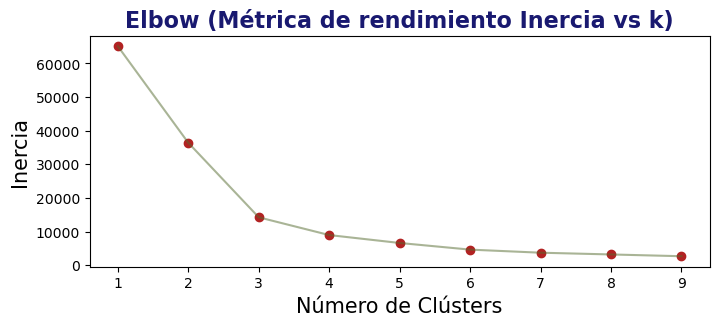

In [19]:
# Luego graficamos el scatterplot entre el número de clústers k y la métrica de inercia:
plt.figure(1 , figsize = (8 ,3))
plt.title("Elbow (Métrica de rendimiento Inercia vs k)", fontsize = 16, weight='bold', color= 'midnightblue')
plt.plot(np.arange(1 , 10) , inertia , 'o', color = "firebrick")
plt.plot(np.arange(1 , 10) , inertia , '-' , alpha = 0.5, color = "darkolivegreen")
plt.xlabel('Número de Clústers', fontsize = 15) , plt.ylabel('Inercia', fontsize = 15)
plt.show()

<font size='3'>
<br>
De acuerdo al gráfico anterior y al "elbow" que nos indica el número óptimo de clústers para este dataset, vamos a crear la visualización de los centroides y sus correspondientes regiones. Además con los scatterplots para la data con o sin estandarizar, comprobamos que para este ejercicio no es necesario aplicar el StandardScaler a nuestros datos.
</br>
</font>

In [20]:
# Tomamos de nuestro backup la data original para estas dos variables:
X1 = df_Adults_2[['capital-gain', 'age']].values

In [21]:
# Ejecutamos el algoritmo para 4 clústers:
four_groups = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001, random_state= 111 )
four_groups.fit(X1)
labels = four_groups.labels_
centroides = four_groups.cluster_centers_

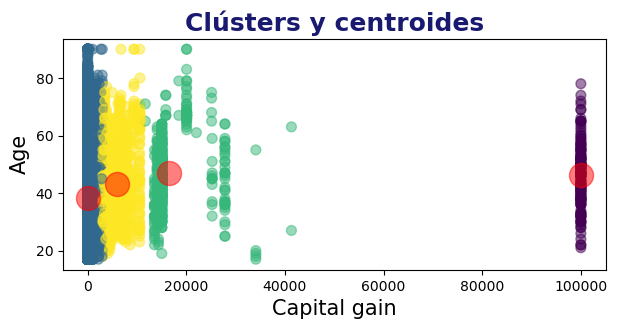

In [22]:
# Por último graficamos los clúster y los centroides correspondientes:
plt.figure(1 , figsize = (7, 3))
plt.clf()
plt.title("Clústers y centroides", fontsize = 18, weight='bold', color= 'midnightblue')
plt.scatter(x="capital-gain" , y= "age", data = df_Adults_2, s = 50, c=labels, alpha = 0.5)
plt.scatter(x = centroides[: , 0] , y =  centroides[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Age', fontsize = 15)
plt.xlabel('Capital gain', fontsize = 15)
plt.show()

## Conclusiones


<font size='3'>

* A nivel general este es uno de los algoritmos no supervisados más prácticos de aplicar en problemas de clasificación.


* Como apreciamos en los scatterplots, no siempre es necesario estandarizar o normalizar la data, se debe revisar este paso con detenimiento para evitar sesgos e imprecisiones.


* La métrica de performance de inercia calcula el mean square distance entre cada observación y su centroide más cercano.


* El concepto de **Elbow** o codo nos ayuda a determinar el número __k__ de clústeres más adecuado para el ejercicio intentando evitar overfitting ó underfitting teniendo en cuenta la relación entre los valores que tome **k** y su inercia asociada.
    
    
* Para el algoritmo K-Modes es importante tener en cuenta el uso de la distancia Hamming en vez de la euclidiana (como se usa normalmente para K-Means) y del uso de la moda como medida de tendencia central en vez de la media aritmética, dado que está diseñado para variables categóricas.
    
    
* El **Chi-Squared test** es el análogo del coeficiente de correlación de Pearson para las variables categóricas.

#### Referencias:
[1]. Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

[2]. Congressional Voting Records. (2020).Kaggle.Taken from:https://www.kaggle.com/datasets/devvret/congressional-voting-records

[3]. Pedregosa, F., Varoquaux, Gael, Gramfort, A., Michel, V., Thirion, B., Grisel, O., … others. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825–2830.

[4].  Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science &amp; Engineering, 9(3), 90–95.

[5]. Heeral, D. (2021)."KMeans Clustering for Customer Data", Taken from: https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data/notebook 

[6]. Bonthu, H. (2022). KModes Clustering Algorithm for Categorical data. Taken from: https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/?#

[7]. K-Mode Clustering in Python. (2023). K-Mode Clustering in Python. Taken from: https://www.geeksforgeeks.org/k-mode-clustering-in-python/


[8]. Kaplan, D. (2022). K Mode Clustering Python (Full Code). Taken from: https://enjoymachinelearning.com/blog/k-mode-clustering-python/
